In [1]:
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import *
import warnings
from add_drive_cost import *


In [3]:
wt = pd.read_csv('weather_final.csv')
wt['temperature'] = wt['temperature'].fillna(wt['temperature_predictions'])
rd = pd.read_csv('rides_final.csv')
rd['hour_total'] = pd.to_datetime(rd['start_date']).apply(lambda x: x.hour + x.dayofyear * 24)

In [68]:
wt_to_rd = pd.merge(rd, wt, on='hour_total', how='inner')

In [69]:
wt_to_rd

,Unnamed: 0.1,Unnamed: 0_x,unnamed:_0.1,unnamed:_0_x,id,start_date,end_date,start_location,start_district,end_location,...,hour_category_afternoon,hour_category_evening,hour_category_morning,hour_category_nan,hour_category_night,season_spring,season_summer,season_nan,temperature_predictions,temperature_interpolated
0,0,0,0,0,100340,2023-04-22 09:01:03,2023-04-22 09:24:45,шевченко,юго-восточный,майская,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.786905,13.850245
1,1,1,1,1,100341,2023-04-22 09:01:07,2023-04-22 09:29:32,чехова,заречный,спортивная,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.786905,13.850245
2,2,2,2,2,100342,2023-04-22 09:04:27,2023-04-22 09:42:46,буденного,октябрьский,суворова,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.786905,13.850245
3,3,3,3,3,100343,2023-04-22 09:06:34,2023-04-22 09:38:23,труда,центральный,рабочая,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.786905,13.850245
4,4,4,4,4,100344,2023-04-22 09:09:27,2023-04-22 09:40:07,первомайская,северо-западный,юбилейная,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,9.786905,13.850245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96812,96812,101671,102250,102250,197707,2023-07-31 23:45:06,2023-08-01 00:06:55,озерная,юго-восточный,первомайская,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21.748336,20.620245
96813,96813,101672,102251,102251,197708,2023-07-31 23:46:01,2023-08-01 00:25:35,мичурина,ленинский,садовая,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21.748336,20.620245
96814,96814,101673,102252,102252,197709,2023-07-31 23:48:04,2023-08-01 00:09:21,лермонтова,ленинский,куйбышева,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21.748336,20.620245
96815,96815,101674,102253,102253,197710,2023-07-31 23:51:41,2023-08-01 00:38:04,рябиновая,северо-западный,энергетиков,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,21.748336,20.620245


In [72]:
wt_to_rd1 = wt_to_rd[['distance','promo','duration_sec','speed','drive_cost','hour_total','temperature','precipitation_total','wind_gust','cloud_cover_total','sunshine_duration']]
wt_to_rd = wt_to_rd[['start_date', 'distance','promo','duration_sec','speed','drive_cost','hour_total','temperature','precipitation_total','wind_gust','cloud_cover_total','sunshine_duration']]

In [71]:
wt_to_rd1.corr().to_excel('corr_total.xlsx')

PermissionError: [Errno 13] Permission denied: 'corr_total.xlsx'

<Axes: >

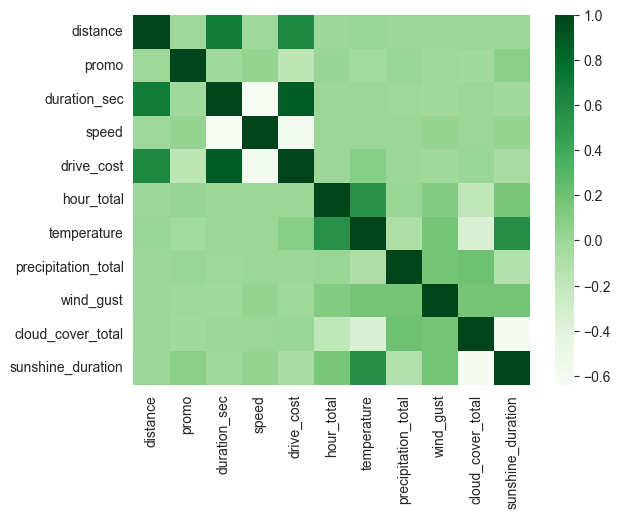

In [73]:
sns.heatmap(wt_to_rd1.corr(), cmap='Greens')

Сильных зависимостей между характеристиками погоды и поездки нет

In [74]:
wt_to_rd['start_date'] = pd.to_datetime(wt_to_rd['start_date'])
wt_to_rd['rides'] = 1
# Установка столбца 'start_date' в качестве индекса DataFrame
wt_to_rd['start_date'] = wt_to_rd['start_date'].round('H')
wt_to_rd.set_index('start_date', inplace=True)

# Resample данных по часам и агрегация средних значений других столбцов
resampled_data = wt_to_rd.resample('H').sum()
for i in resampled_data.columns[:-1]:
    resampled_data.i = resampled_data.i.apply(lambda x: x / resampled_data.rides)

C:\Users\UG\AppData\Local\Temp\ipykernel_5728\54362907.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled_data = wt_to_rd.resample('H').sum()


AttributeError: 'DataFrame' object has no attribute 'i'

In [ ]:
resampled_data

In [75]:
resampled_data['hour'] = resampled_data.index.hour
resampled_data['day_of_week'] = resampled_data.index.dayofweek
resampled_data['is_weekend'] = resampled_data['day_of_week'].isin([5, 6]).astype(int)  # 5 и 6 соответствуют субботе и воскресенью

# Подготовка признаков и целевой переменной для регрессии
X = resampled_data[['hour', 'day_of_week', 'is_weekend', 'temperature', 'precipitation_total', 'wind_gust', 'cloud_cover_total', 'sunshine_duration']]
y = resampled_data['rides']

# Разделение данных на обучающий и тестовый наборы, обучение модели регрессии и оценка ее качества
# Необходимо использовать методы машинного обучения для обучения модели на X и y

# Пример использования линейной регрессии для предсказания rides
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
x_tt = resampled_data[['hour', 'day_of_week', 'is_weekend', 'temperature', 'precipitation_total', 'wind_gust', 'cloud_cover_total', 'sunshine_duration']]
predictions = model.predict(X_test)
resampled_data['prediction_rides'] = model.predict(x_tt)
# Оценка качества модели
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 61.19422182422973


Text(0.5, 1.0, 'Сравнение предсказаний регрессионной модели и реальных значений')

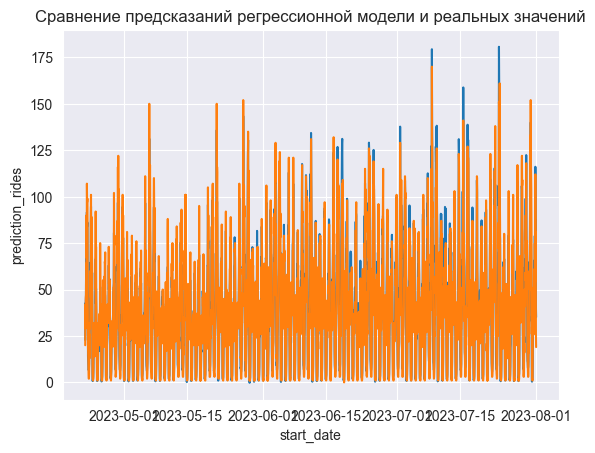

In [76]:
sns.lineplot(x=resampled_data.index, y=resampled_data.prediction_rides)
sns.lineplot(x=resampled_data.index, y=resampled_data.rides)
plt.title('Сравнение предсказаний регрессионной модели и реальных значений')

Text(0.5, 1.0, 'Сравнение предсказаний регрессионной модели и реальных значений')

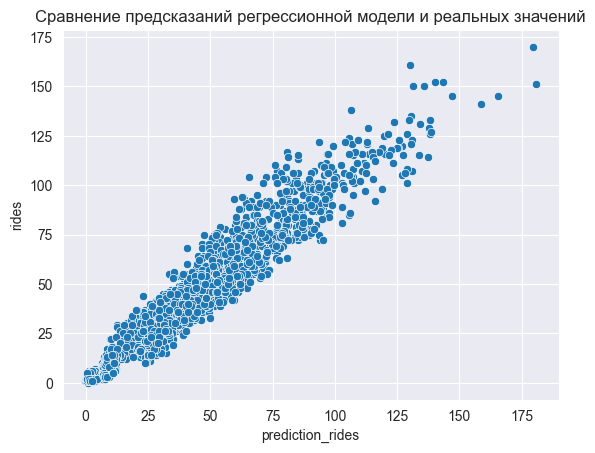

In [78]:
sns.scatterplot(x=resampled_data.prediction_rides, y=resampled_data.rides)
plt.title('Сравнение предсказаний регрессионной модели и реальных значений')

Видно, что регрессия довольно хорошо предсказывает предполагаемый спрос, хотя не всегда она делает это точно